In [1]:
import pandas as pd
import re
import time, os
import datetime as dt

In [2]:
ridership = pd.read_csv('MTA_subway_bus_ridership.csv')
ridership.head()

,Date,Ridership,Subway_Bus
0,9/23/2021,3019343,1
1,9/22/2021,3026655,1
2,9/21/2021,3024458,1
3,9/20/2021,2889141,1
4,9/19/2021,1598414,1


In [3]:
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        1144 non-null   object
 1   Ridership   1144 non-null   int64 
 2   Subway_Bus  1144 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 26.9+ KB


In [4]:
final_df = pd.read_csv('final_df1.csv')
final_df.tail()

,Date,Temp_max,Temp_avg,Temp_min,DP_max,DP_avg,DP_min,Humid(%)_max,Humid(%)_avg,Humid(%)_min,WindSp(mph)_max,WindSp(mph)_avg,WindSp(mph)_min,Pr(Hg)_max,Pr(Hg)_avg,Pr(Hg)_min,Precip(in),Year,Month
574,26.0,74.0,69.3,64,54.0,46.8,40,65.0,46.1,29,20.0,12.7,5,29.9,29.9,29.8,0.0,2021,9
575,27.0,81.0,72.9,65,52.0,46.1,43,48.0,38.8,28,24.0,13.0,5,30.0,29.9,29.8,0.0,2021,9
576,NaN,NaN,0.0,0,NaN,0.0,0,NaN,0.0,0,NaN,0.0,0,NaN,0.0,0.0,NaN,2021,9
577,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,2021,9
578,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0.0,2021,9


In [5]:
final_dfdrop = final_df.drop([572, 573, 574, 575, 576, 577, 578])

In [6]:
final_dfdrop.tail(10)

,Date,Temp_max,Temp_avg,Temp_min,DP_max,DP_avg,DP_min,Humid(%)_max,Humid(%)_avg,Humid(%)_min,WindSp(mph)_max,WindSp(mph)_avg,WindSp(mph)_min,Pr(Hg)_max,Pr(Hg)_avg,Pr(Hg)_min,Precip(in),Year,Month
562,14.0,80.0,74.7,71,70.0,63.4,57,83.0,68.5,47,13.0,7.9,0,30.1,30.0,30.0,0.03,2021,9
563,15.0,88.0,79.4,73,70.0,68.0,64,85.0,69.3,48,15.0,8.3,0,30.0,29.9,29.9,0.00,2021,9
564,16.0,77.0,74.0,73,67.0,63.7,61,81.0,70.1,60,17.0,11.8,7,30.2,30.1,30.0,0.00,2021,9
565,17.0,75.0,72.7,70,69.0,66.7,65,87.0,81.5,73,17.0,12.7,7,30.2,30.2,30.1,0.00,2021,9
566,18.0,85.0,76.5,70,67.0,64.5,62,87.0,68.0,46,13.0,6.7,0,30.1,30.0,29.9,0.00,2021,9
567,19.0,77.0,72.3,67,62.0,52.6,49,68.0,51.0,37,18.0,7.8,0,30.2,30.1,30.0,0.00,2021,9
568,20.0,75.0,69.9,65,60.0,55.7,52,73.0,61.1,49,14.0,6.9,0,30.4,30.3,30.2,0.00,2021,9
569,21.0,76.0,71.0,64,67.0,60.8,54,84.0,70.7,57,14.0,8.4,3,30.4,30.3,30.2,0.00,2021,9
570,22.0,80.0,74.9,72,69.0,68.1,66,87.0,79.5,64,18.0,11.7,5,30.2,30.1,30.0,0.01,2021,9
571,23.0,83.0,75.0,66,69.0,66.5,60,90.0,75.4,58,25.0,14.1,5,30.0,29.9,29.9,0.00,2021,9


In [7]:
final = final_dfdrop.reindex(index=final_dfdrop.index[::-1])
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 571 to 0
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             572 non-null    float64
 1   Temp_max         572 non-null    float64
 2   Temp_avg         572 non-null    float64
 3   Temp_min         572 non-null    int64  
 4   DP_max           572 non-null    float64
 5   DP_avg           572 non-null    float64
 6   DP_min           572 non-null    int64  
 7   Humid(%)_max     572 non-null    float64
 8   Humid(%)_avg     572 non-null    float64
 9   Humid(%)_min     572 non-null    int64  
 10  WindSp(mph)_max  572 non-null    float64
 11  WindSp(mph)_avg  572 non-null    float64
 12  WindSp(mph)_min  572 non-null    int64  
 13  Pr(Hg)_max       572 non-null    float64
 14  Pr(Hg)_avg       572 non-null    float64
 15  Pr(Hg)_min       572 non-null    float64
 16  Precip(in)       572 non-null    float64
 17  Year            

In [8]:
fin_rider = pd.concat([final, final], ignore_index = True, axis = 0)

In [9]:
fin_rid = fin_rider.rename(columns={"Date": "dat"})


In [10]:
result = pd.concat([fin_rid, ridership], axis=1, join="inner").reindex(fin_rid.index)

In [11]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dat              1144 non-null   float64
 1   Temp_max         1144 non-null   float64
 2   Temp_avg         1144 non-null   float64
 3   Temp_min         1144 non-null   int64  
 4   DP_max           1144 non-null   float64
 5   DP_avg           1144 non-null   float64
 6   DP_min           1144 non-null   int64  
 7   Humid(%)_max     1144 non-null   float64
 8   Humid(%)_avg     1144 non-null   float64
 9   Humid(%)_min     1144 non-null   int64  
 10  WindSp(mph)_max  1144 non-null   float64
 11  WindSp(mph)_avg  1144 non-null   float64
 12  WindSp(mph)_min  1144 non-null   int64  
 13  Pr(Hg)_max       1144 non-null   float64
 14  Pr(Hg)_avg       1144 non-null   float64
 15  Pr(Hg)_min       1144 non-null   float64
 16  Precip(in)       1144 non-null   float64
 17  Year          

In [12]:
result.describe()

,dat,Temp_max,Temp_avg,Temp_min,DP_max,DP_avg,DP_min,Humid(%)_max,Humid(%)_avg,Humid(%)_min,...,WindSp(mph)_avg,WindSp(mph)_min,Pr(Hg)_max,Pr(Hg)_avg,Pr(Hg)_min,Precip(in),Year,Month,Ridership,Subway_Bus
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,...,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1.144000e+03,1144.000000
mean,15.608392,67.643357,60.831818,54.807692,50.688811,44.978322,38.526224,74.671329,58.959091,41.284965,...,10.525874,3.293706,30.094930,29.995979,29.900175,0.137622,2020.465035,6.297203,1.228343e+06,0.500000
std,8.773646,17.392351,16.288762,15.946589,16.905926,17.762471,18.630477,14.159831,14.927400,15.132575,...,3.799456,3.564837,0.199454,0.206969,0.217075,0.427515,0.498994,3.011054,6.742940e+05,0.500219
min,1.000000,27.000000,22.500000,18.000000,6.000000,0.600000,-5.000000,38.000000,25.800000,12.000000,...,2.300000,0.000000,29.500000,29.300000,29.100000,0.000000,2020.000000,1.000000,1.986930e+05,0.000000
25%,8.000000,53.000000,47.575000,42.000000,37.000000,30.725000,23.000000,63.000000,47.300000,30.000000,...,7.900000,0.000000,29.975000,29.900000,29.800000,0.000000,2020.000000,4.000000,7.608632e+05,0.000000
50%,16.000000,70.000000,62.150000,55.000000,53.000000,46.450000,39.000000,78.000000,58.950000,40.000000,...,9.700000,3.000000,30.100000,30.000000,29.900000,0.000000,2020.000000,6.000000,1.114435e+06,0.500000
75%,23.000000,82.000000,75.300000,70.000000,66.000000,61.700000,56.000000,87.000000,70.525000,51.000000,...,12.500000,6.000000,30.200000,30.100000,30.000000,0.070000,2021.000000,9.000000,1.588215e+06,1.000000
max,31.000000,100.000000,90.200000,84.000000,75.000000,72.600000,70.000000,100.000000,91.800000,89.000000,...,25.900000,18.000000,30.700000,30.600000,30.400000,6.860000,2021.000000,12.000000,5.515945e+06,1.000000


In [13]:
# fin_rid.dat = fin_rid.dat.astype('int64')
# fin_rid.dat = fin_rid.dat.astype('string')
# fin_rid.Month = fin_rid.Month.astype('string')
# fin_rid.Year = fin_rid.Year.astype('string')
# fin_rid.info()

In [14]:
# fin_rid["Date"] = fin_rid["Month"] + '/' + fin_rid["dat"] + '/' + fin_rid["Year"]

In [15]:
fin_rid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dat              1144 non-null   float64
 1   Temp_max         1144 non-null   float64
 2   Temp_avg         1144 non-null   float64
 3   Temp_min         1144 non-null   int64  
 4   DP_max           1144 non-null   float64
 5   DP_avg           1144 non-null   float64
 6   DP_min           1144 non-null   int64  
 7   Humid(%)_max     1144 non-null   float64
 8   Humid(%)_avg     1144 non-null   float64
 9   Humid(%)_min     1144 non-null   int64  
 10  WindSp(mph)_max  1144 non-null   float64
 11  WindSp(mph)_avg  1144 non-null   float64
 12  WindSp(mph)_min  1144 non-null   int64  
 13  Pr(Hg)_max       1144 non-null   float64
 14  Pr(Hg)_avg       1144 non-null   float64
 15  Pr(Hg)_min       1144 non-null   float64
 16  Precip(in)       1144 non-null   float64
 17  Year          

In [16]:
#fin_rid.Year = fin_rid.Year.astype('object')
# date = ridership["Date"]
# #display(date)
# fin_rid = fin_rid.merge(ridership, on = 'Date')
# fin_rid.info()
#result = fin_rid.append(ridership, ignore_index=True, sort=False)
#result = pd.concat([fin_rid, df4], axis=1, join="inner")
# result = pd.concat([fin_rid, ridership], axis=1, join="inner").reindex(fin_rid.index)

In [17]:
# result.tail()

In [18]:
subset = result[["Temp_max", "Temp_avg", "Temp_min", "WindSp(mph)_avg", "Precip(in)", "Ridership", "Subway_Bus", "Date"]]

In [19]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temp_max         1144 non-null   float64
 1   Temp_avg         1144 non-null   float64
 2   Temp_min         1144 non-null   int64  
 3   WindSp(mph)_avg  1144 non-null   float64
 4   Precip(in)       1144 non-null   float64
 5   Ridership        1144 non-null   int64  
 6   Subway_Bus       1144 non-null   int64  
 7   Date             1144 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 71.6+ KB


In [20]:
subset.describe()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus
count,1144.000000,1144.000000,1144.000000,1144.000000,1144.000000,1.144000e+03,1144.000000
mean,67.643357,60.831818,54.807692,10.525874,0.137622,1.228343e+06,0.500000
std,17.392351,16.288762,15.946589,3.799456,0.427515,6.742940e+05,0.500219
min,27.000000,22.500000,18.000000,2.300000,0.000000,1.986930e+05,0.000000
25%,53.000000,47.575000,42.000000,7.900000,0.000000,7.608632e+05,0.000000
50%,70.000000,62.150000,55.000000,9.700000,0.000000,1.114435e+06,0.500000
75%,82.000000,75.300000,70.000000,12.500000,0.070000,1.588215e+06,1.000000
max,100.000000,90.200000,84.000000,25.900000,6.860000,5.515945e+06,1.000000


In [21]:
subset['Date'] = pd.to_datetime(subset['Date'])

/tmp/ipykernel_283599/1842453496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Date'] = pd.to_datetime(subset['Date'])


In [22]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Temp_max         1144 non-null   float64       
 1   Temp_avg         1144 non-null   float64       
 2   Temp_min         1144 non-null   int64         
 3   WindSp(mph)_avg  1144 non-null   float64       
 4   Precip(in)       1144 non-null   float64       
 5   Ridership        1144 non-null   int64         
 6   Subway_Bus       1144 non-null   int64         
 7   Date             1144 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 71.6 KB


In [23]:
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import PairGrid
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=0.7)

In [ ]:
pairplot = sns.pairplot(subset, height=1.4, plot_kws={'s': 6});
# #swarm_plot = sns.swarmplot(pairplot)
plt.savefig('pairplot.png')

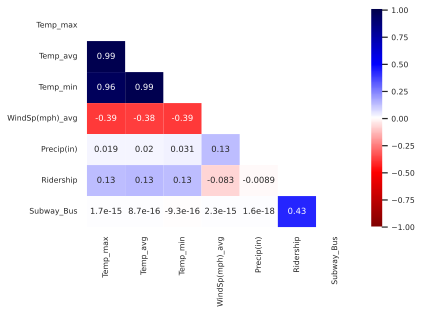

In [25]:
upper = np.triu(subset.corr())  # optionally, you can just look at the lower triangle
sns.heatmap(subset.corr(), cmap="seismic_r", annot=True, vmin=-1, vmax=1, mask=upper);
plt.savefig('heatmap.png')

In [26]:
subset['Day_of_week'] = pd.to_datetime(subset['Date']).dt.weekday

/tmp/ipykernel_283599/1518212483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Day_of_week'] = pd.to_datetime(subset['Date']).dt.weekday


In [27]:
subset.head()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6


In [28]:
#subset['Weekend'] = subset.date.dt.weekday>5
subset['Weekend'] = 1 * (subset['Day_of_week'] > 4)

/tmp/ipykernel_283599/2737808240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Weekend'] = 1 * (subset['Day_of_week'] > 4)


In [29]:
subset.head()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1


In [30]:
subset['Season'] = (subset['Date'].dt.month%12 + 3)//3
# subset['Season'] += (subset.dt.month == 3)&(subset.dt.day>=20)
# subset['Season'] += (subset.dt.month == 6)&(subset.dt.day>=21)
# subset['Season'] += (subset.dt.month == 9)&(subset.dt.day>=23)
# subset['Season'] -= 3*((subset.dt.month == 12)&(subset.dt.day>=21)).astype(int)

/tmp/ipykernel_283599/3975558589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Season'] = (subset['Date'].dt.month%12 + 3)//3


In [31]:
subset['Winter'] = 1 * (subset['Season'] == 1)
subset['Spring'] = 1 * (subset['Season'] == 2)
subset['Summer'] = 1 * (subset['Season'] == 3)
#pd.get_dummies(subset['Season']).head()

/tmp/ipykernel_283599/2771565999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Winter'] = 1 * (subset['Season'] == 1)
/tmp/ipykernel_283599/2771565999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Spring'] = 1 * (subset['Season'] == 2)
/tmp/ipykernel_283599/2771565999.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [32]:
subset.tail()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer
1139,52.0,44.8,40,12.9,0.00,2244500,0,2020-03-05,3,0,2,0,1,0
1140,57.0,50.5,46,18.2,0.28,2177200,0,2020-03-04,2,0,2,0,1,0
1141,58.0,52.4,48,10.1,0.01,2228600,0,2020-03-03,1,0,2,0,1,0
1142,56.0,48.2,38,10.3,0.00,2209100,0,2020-03-02,0,0,2,0,1,0
1143,44.0,35.5,26,13.4,0.00,984900,0,2020-03-01,6,1,2,0,1,0


In [33]:
# a=0
# for i in range(1,13):
#     a=(i%12 + 3)//3
#     print(a)
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dr = pd.date_range(start='2020-03-01', end='2021-09-23')
# df = pd.DataFrame()
# df['Date'] = dr

cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

#subset['Holiday'] = subset['Date'].isin(holidays)

subset['Holiday'] = 1 * (subset['Date'].isin(holidays) == True) 
#df['Holiday'] = 0 * (df['Date'].isin(holidays) == False)
# mask = df.Holiday == 1
# df[mask].head(30)


/tmp/ipykernel_283599/2422997591.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Holiday'] = 1 * (subset['Date'].isin(holidays) == True)


In [34]:
subset.head()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0


In [35]:
# cal = calendar()
# holidays = cal.holidays(start=dr.min(), end=dr.max())

# #subset['Holiday'] = subset['Date'].isin(holidays)

# subset['Holiday'] = 1 * (subset['Date'].isin(holidays) == True)
# subset['Holiday'] = 0 * (subset['Date'].isin(holidays) == False)

In [36]:
subset['Weekend_avg_temp'] = subset['Weekend'] * subset['Temp_avg']
subset.head()

/tmp/ipykernel_283599/3624354659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Weekend_avg_temp'] = subset['Weekend'] * subset['Temp_avg']


,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday,Weekend_avg_temp
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0,0.0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0,0.0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0,0.0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0,0.0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0,72.3


In [37]:
subset['Weekend_precip'] = subset['Weekend'] * subset['Precip(in)']
subset.head()

/tmp/ipykernel_283599/1611395480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Weekend_precip'] = subset['Weekend'] * subset['Precip(in)']


,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday,Weekend_avg_temp,Weekend_precip
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0,0.0,0.0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0,0.0,0.0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0,0.0,0.0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0,0.0,0.0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0,72.3,0.0


In [38]:
subset['Holiday_precip'] = subset['Holiday'] * subset['Precip(in)']
subset.head()

/tmp/ipykernel_283599/3251009841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Holiday_precip'] = subset['Holiday'] * subset['Precip(in)']


,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday,Weekend_avg_temp,Weekend_precip,Holiday_precip
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0,0.0,0.0,0.0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0,0.0,0.0,0.0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0,0.0,0.0,0.0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0,0.0,0.0,0.0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0,72.3,0.0,0.0


In [39]:
subset['Holiday_avg_temp'] = subset['Holiday'] * subset['Temp_avg']
subset.head()

/tmp/ipykernel_283599/1368402159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Holiday_avg_temp'] = subset['Holiday'] * subset['Temp_avg']


,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday,Weekend_avg_temp,Weekend_precip,Holiday_precip,Holiday_avg_temp
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0,0.0,0.0,0.0,0.0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0,0.0,0.0,0.0,0.0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0,0.0,0.0,0.0,0.0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0,0.0,0.0,0.0,0.0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0,72.3,0.0,0.0,0.0


In [40]:
#sns.pairplot(subset, height=1.4, plot_kws={'s': 6})

In [41]:
subset.to_csv('data.csv', index=False)